
# Entendendo o Objetivo
Você recebeu a tarefa de elaborar um relatório que responda às perguntas de dois executivos do hospital onde você trabalha, a respeito dos resultados públicos da PNAD COVID-19 realizada pelo IBGE entre os meses de maio e novembro de 2020.

### O período de interesse deles é entre julho e outubro de 2020, quando houve a queda da primeira onda da doença.

A **diretora clínica** gostaria que você respondesse às seguintes perguntas:

1) Quais regiões tem maior prevalência de doenças crônicas?

2) Como foi o uso de testes para saber se estava infectado pela Covid-19?

3) A base de dados é confiável para avaliar os sintomas de síndrome gripal na população?




Já a **diretora financeira** gostaria que você respondesse às seguintes perguntas:

1) A maioria da população possui algum tipo de convênio médico?

2) A maioria dos entrevistados solicitaram empréstimos? Houve aumento na solicitação de empréstimos durante o período?

3) Qual a probabilidade de aumentar a solicitação de empréstimo com o passar do tempo?




# Entendendo a base de dados:

O **PNAD COVID-19** foi uma mudança da PNAD contínua, pensada e desenvolvida em um período recorde de 2 meses, no dia 17 de março de 2020. 
A PNAD continua é uma pesquisa sobre indicadores do mercado de trabalho, e as duas não são comparáveis.


É uma pesquisa que era feita de forma presencial. Foi referida muita dificuldade devido a necessidade da abordagem ser por telefone, e houve uma queda do aproveitamento dos dados cerca de 92% para cerca de 60%. 


Outra intenção seria a de trazer informações sobre sintomas de síndrome gripal que poderiam ajudar o ministério da saúde, mas não foi uma pesquisa sobre COVID-19 e sim sobre os efeitos da pandemia no mercado de trabalho, e a pesquisa foi colocada em uma categoria de estatística experimental.



### Objetivos da PNAD COVID-19:

- Monitorar as mudanças no mercado de trabalho decorrentes da pandemia e no rendimento domiciliar.

- Estimar a quantidade de pessoas com sintomas referidos associados à síndrome gripal e a procura por estabelecimento de saúde. Ela NÃO investiga o diagnóstico médico de  COVID-19 de sintomas relacionados a síndromes gripais.São sintomas referidos pelos moradores, na semana de referencia, não é medida acumulativa das semanas.


### Caracteristicas: 
- A amostra saiu de uma amostra de domicílios da PNAD contínua.
Foram cerca de 190 mil entrevistas em 48 mil lares brasileiros.

- Indicadores de desocupação (força de trabalho desocupada) variam bastante na PNAD COVID-19 por serem mais voláteis.

- Os mesmos domicílios foram entrevistados todos os meses


# Vamos começar com a parte de ETL da base de dados

In [44]:
#importando as bibliotecas a serem utilizadas durante a etapa
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importando as tabelas dos períodos para verificar as diferenças entre elas

c19_jul = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\PNAD_COVID19\PNAD_COVID_072020.csv')
c19_aug = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\PNAD_COVID19\PNAD_COVID_082020.csv')
c19_sep = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\PNAD_COVID19\PNAD_COVID_092020.csv')
c19_oct = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\PNAD_COVID19\PNAD_COVID_102020.csv')
c19_nov = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\PNAD_COVID19\PNAD_COVID_112020.csv')

In [3]:
# código usado para expnadir os conteúdos dos dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

In [4]:
c19_jul.info()
colunas_jul = c19_jul.columns.to_list()  
print(colunas_jul)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384166 entries, 0 to 384165
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 425.0 MB
['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C

In [5]:
c19_aug.info()
colunas_aug = c19_aug.columns.to_list()  
print(colunas_aug)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386520 entries, 0 to 386519
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 427.6 MB
['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C

In [6]:
c19_sep.info()
colunas_sep = c19_sep.columns.to_list()  
print(colunas_sep)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387298 entries, 0 to 387297
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 428.5 MB
['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C

In [7]:
c19_oct.info()
colunas_oct = c19_oct.columns.to_list()  
print(colunas_oct)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380461 entries, 0 to 380460
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 420.9 MB
['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C

In [8]:

c19_nov.info()
colunas_nov = c19_nov.columns.to_list()  
print(colunas_nov)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381438 entries, 0 to 381437
Columns: 148 entries, Ano to F006
dtypes: float64(90), int64(58)
memory usage: 430.7 MB
['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A006A', 'A006B', 'A007', 'A007A', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 

In [9]:
# verificando um dos dataframes
c19_jul.head(10)

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,152452,130.595605,149.671109,1114,1,1,5,8,1984,35,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0
1,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,154289,130.595605,145.296688,1123,2,2,18,8,1990,29,2,4,7,2.0,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,3,2.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,10.0,1.0,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0
2,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,145749,130.595605,166.254114,1112,3,4,25,12,2006,13,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0
3,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,145749,130.595605,166.254114,1112,4,4,24,8,2009,10,1,4,2,1.0,1.0,5.0,3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0
4,2020,11,11.0,NaN,2,1,7,3,1110011,110015970,1,1,91395,130.595605,126.960477,1126,1,1,18,5,1963,57,2,1,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,3,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2,NaN,2,NaN,2,NaN,1,1045.0,2,NaN,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0
5,2020,11,11.0,NaN,4,4,7,3,1110011,110015970,1,1,122744,130.595605,165.550657,1115,1,1,18,2,1973,47,1,4,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2.0,NaN,1.0,2.0,2.0,NaN,2,2,2,2,2,2,2,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,2.0,7.0,NaN,NaN,18.0,5.0,NaN,NaN,NaN,NaN,44.0,0.0,NaN,1.0,1.0,5.0,2000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,600.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,1.0
6,2020,11,11.0,NaN,4,4,7,3,1110

# Diferenças entre as tabelas:

## Ao longo do período de pesquisa, foram adicionadas questões em 2 tempos diferentes.

### Julho: a partir do mês 07 tivemos a adição das seguintes colunas


**B00113** - adição do sintoma "Diarréia" ao quadro de sintomas da síndrome gripal


**B009A à B009F** - a partir do mês 07 de 2020 houve o surgimento dos primeiros testes para a detecção da Covid-19, então foram adicionadas as questões sobre a realização deles


**B0101 à B0106** - adição de perguntas relacionadas às principais doenças crônicas que assolam a população


**B011** - adição de pergunta sobre a adoção de medida de restrição


**C007F** - adição de pergunta sobre estar com o contrato de trabalho suspenso


**C009A** - adição de pergunta sobre querer ter trabalhado o número de horas que trabalhou na semana anterior


### Novembro: em seu último mês de pesquisa, foram adicionadas mais duas perguntas

**A006A** - se a escola ou faculdade frequentadas são públicas ou privadas

**A006B** - se as aulas estavam sendo presenciais ou não




In [10]:
#cria uma função para verificar a porcentagem de valores nulos em cada coluna
def valores_nulos(df):
    total_nulos = df.isnull().sum()
    porcentagem_nulos = (total_nulos / len(df)) * 100
    return pd.DataFrame({'Total nulos': total_nulos, 'Porcentagem de nulos': porcentagem_nulos})

# aplicando a função nos dataframes que de fato serão utilziados

valores_nulos(c19_jul).sort_values(by='Porcentagem de nulos', ascending=False)
valores_nulos(c19_aug).sort_values(by='Porcentagem de nulos', ascending=False)
valores_nulos(c19_sep).sort_values(by='Porcentagem de nulos', ascending=False)
valores_nulos(c19_oct).sort_values(by='Porcentagem de nulos', ascending=False)


,Total nulos,Porcentagem de nulos
C0103,380371,99.976344
C0052,380350,99.970825
C0053,380283,99.953215
B006,380279,99.952163
C007E2,379858,99.841508
C007F,379177,99.662515
C011A2,379174,99.661726
C011A22,379174,99.661726
C011A21,379174,99.661726
C01022,379100,99.642276


# Entendendo os nulos
Há colunas com uma quantidade expressiva de valores nulos, mas o que eles querem dizer?

Ao ler os dicionários, descobrimos que a maioria das respostas em brancas são as respostas contempladas como "Não se aplica".

Ao ler o questionário e o desenho do fluxo de perguntas, baseado na resposta de certo item, o questionário pulava certas questões *(cópias dos roteiros estão na pasta Documentos)*.


In [11]:
valores_semana_jul = c19_jul['V1012'].value_counts()
print(valores_semana_jul)


V1012
4    97051
3    96633
2    96537
1    93945
Name: count, dtype: int64


In [12]:
testes_covid_jul = c19_jul['B008'].value_counts()
print(testes_covid_jul)

B008
2    358504
1     23673
9      1989
Name: count, dtype: int64


In [13]:
nulos_testes_covid_jul = c19_jul['B008'].isnull().sum()
print(nulos_testes_covid_jul)

0


In [14]:
testes_covid2_jul = c19_jul['B009A'].value_counts()
print(testes_covid2_jul)

B009A
2.0    15818
1.0     7641
9.0      214
Name: count, dtype: int64


In [15]:
nulos_testes_covid2_jul = c19_jul['B009A'].isnull().sum()
print(nulos_testes_covid2_jul)

360493


In [16]:

# Adaptação da função para criar a coluna 'Dia' com base em 'V1012'
# Como pelos dicionários não há valores fora de 1 a 4, verificado pelo código acima, não precisará de um fallback
def calcular_dia(semana_jul):
    if semana_jul == 1:
        return 1
    elif semana_jul == 2:
        return 8
    elif semana_jul == 3:
        return 15
    elif semana_jul == 4:
        return 22

# Aplica a função criada na coluna 'V1012' para criar a nova coluna 'Dia'
c19_jul['Dia'] = c19_jul['V1012'].apply(calcular_dia)

# Cria uma nova coluna 'Data' concatenando Ano, V1013 e Dia 
c19_jul['Data'] = pd.to_datetime(c19_jul['Ano'].astype(str) + '-' +
                                 c19_jul['V1013'].astype(str).str.zfill(2) + '-' +
                                 c19_jul['Dia'].astype(str).str.zfill(2))

# Ver a tabela com as novas colunas 'Dia' e 'Data'
print(c19_jul[['Ano', 'V1013', 'V1012', 'Dia', 'Data']].head())




    Ano  V1013  V1012  Dia       Data
0  2020      7      4   22 2020-07-22
1  2020      7      4   22 2020-07-22
2  2020      7      4   22 2020-07-22
3  2020      7      4   22 2020-07-22
4  2020      7      1    1 2020-07-01


In [17]:
# Verificando se os dados da coluna criada estão no formato datetime
print(c19_jul['Data'].dtypes)

datetime64[ns]


In [18]:
c19_jul.head(1)

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006,Dia,Data
0,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,152452,130.595605,149.671109,1114,1,1,5,8,1984,35,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0,22,2020-07-22


In [19]:

def calcular_dia(semana_aug):
    if semana_aug == 1:
        return 1
    elif semana_aug == 2:
        return 8
    elif semana_aug == 3:
        return 15
    elif semana_aug == 4:
        return 22

c19_aug['Dia'] = c19_aug['V1012'].apply(calcular_dia)

c19_aug['Data'] = pd.to_datetime(c19_aug['Ano'].astype(str) + '-' +
                                 c19_aug['V1013'].astype(str).str.zfill(2) + '-' +
                                 c19_aug['Dia'].astype(str).str.zfill(2))

print(c19_aug[['Ano', 'V1013', 'V1012', 'Dia', 'Data']].head())

    Ano  V1013  V1012  Dia       Data
0  2020      8      4   22 2020-08-22
1  2020      8      4   22 2020-08-22
2  2020      8      4   22 2020-08-22
3  2020      8      4   22 2020-08-22
4  2020      8      1    1 2020-08-01


In [20]:
def calcular_dia(semana_sep):
    if semana_sep == 1:
        return 1
    elif semana_sep == 2:
        return 8
    elif semana_sep == 3:
        return 15
    elif semana_sep == 4:
        return 22

c19_sep['Dia'] = c19_sep['V1012'].apply(calcular_dia)

c19_sep['Data'] = pd.to_datetime(c19_sep['Ano'].astype(str) + '-' +
                                 c19_sep['V1013'].astype(str).str.zfill(2) + '-' +
                                 c19_sep['Dia'].astype(str).str.zfill(2))

print(c19_sep[['Ano', 'V1013', 'V1012', 'Dia', 'Data']].head())

    Ano  V1013  V1012  Dia       Data
0  2020      9      4   22 2020-09-22
1  2020      9      4   22 2020-09-22
2  2020      9      4   22 2020-09-22
3  2020      9      4   22 2020-09-22
4  2020      9      1    1 2020-09-01


In [21]:
def calcular_dia(semana_oct):
    if semana_oct == 1:
        return 1
    elif semana_oct == 2:
        return 8
    elif semana_oct == 3:
        return 15
    elif semana_oct == 4:
        return 22

c19_oct['Dia'] = c19_oct['V1012'].apply(calcular_dia)

c19_oct['Data'] = pd.to_datetime(c19_oct['Ano'].astype(str) + '-' +
                                 c19_oct['V1013'].astype(str).str.zfill(2) + '-' +
                                 c19_oct['Dia'].astype(str).str.zfill(2))

print(c19_oct[['Ano', 'V1013', 'V1012', 'Dia', 'Data']].head())

    Ano  V1013  V1012  Dia       Data
0  2020     10      4   22 2020-10-22
1  2020     10      4   22 2020-10-22
2  2020     10      4   22 2020-10-22
3  2020     10      4   22 2020-10-22
4  2020     10      1    1 2020-10-01


In [22]:
def calcular_dia(semana_nov):
    if semana_nov == 1:
        return 1
    elif semana_nov == 2:
        return 8
    elif semana_nov == 3:
        return 15
    elif semana_nov == 4:
        return 22

c19_nov['Dia'] = c19_nov['V1012'].apply(calcular_dia)

c19_nov['Data'] = pd.to_datetime(c19_nov['Ano'].astype(str) + '-' +
                                 c19_nov['V1013'].astype(str).str.zfill(2) + '-' +
                                 c19_nov['Dia'].astype(str).str.zfill(2))

print(c19_nov[['Ano', 'V1013', 'V1012', 'Dia', 'Data']].head())

    Ano  V1013  V1012  Dia       Data
0  2020     11      4   22 2020-11-22
1  2020     11      4   22 2020-11-22
2  2020     11      4   22 2020-11-22
3  2020     11      4   22 2020-11-22
4  2020     11      1    1 2020-11-01


In [23]:
# Juntar todos os DataFrames em um único DataFrame
pnad_covid = pd.concat([c19_jul, c19_aug, c19_sep, c19_oct, c19_nov], ignore_index=True)

In [24]:
#vamos utilizar este dataframe para análises quantitativas
pnad_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919883 entries, 0 to 1919882
Columns: 150 entries, Ano to A007A
dtypes: datetime64[ns](1), float64(90), int64(59)
memory usage: 2.1 GB


In [25]:
pnad_covid.head(1)

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A007,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006,Dia,Data,A006A,A006B,A007A
0,2020,11,11.0,NaN,1,4,7,3,1110011,110015970,1,1,152452,130.595605,149.671109,1114,1,1,5,8,1984,35,1,4,5,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,1,2,1,1,2.0,22,2020-07-22,NaN,NaN,NaN


In [26]:
#fazendo uma copia extra do df se necessario
pnad_covid2 = pnad_covid.copy()

In [27]:
#exclui as colunas que não utilizaremos nas análises
colunas_excluir = [
    'Ano', 'V1008', 'V1012', 
    'V1013', 'V1023', 'V1030', 'V1031',
    'posest', 'A001','A007A',
    'A001A', 'A001B1', 'A001B2',
    'A006A', 'A006B', 'A007',
    'A008', 'A009', 'C004',
    'C005', 'C0051', 'C0052',
    'C0053', 'C007E', 'C007E1',
    'C007E2', 'C007F', 'C010',
    'C0101', 'C01012', 'C0102',
    'C01021', 'C01022', 'C0103',
    'C0104', 'C011A', 'C011A1', 'C011A11',
    'C011A12', 'C011A21', 'C011A2','C011A22',
    'C012', 'C014', 'D0011',
    'D0013', 'D0021', 'D0023',
    'D0031', 'D0033', 'D0041',
    'D0043', 'D0051', 'D0053',
    'D0061', 'D0063', 'D0071',
    'D0073', 'F0021', 'F0022',
    'F006','Dia', 'A007A', 'F0061'
]

pnad_covid = pnad_covid.drop(columns=colunas_excluir)


In [28]:
colunas_restantes = pnad_covid.columns
print(colunas_restantes)

Index(['UF', 'CAPITAL', 'RM_RIDE', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1032',
       'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'B0011', 'B0012',
       'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110',
       'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033',
       'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044',
       'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B',
       'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104',
       'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C006', 'C007',
       'C007A', 'C007B', 'C007C', 'C007D', 'C008', 'C009', 'C009A', 'C01011',
       'C013', 'C015', 'C016', 'C017A', 'E001', 'E0021', 'E0022', 'E0023',
       'E0024', 'F001', 'F002A1', 'F002A2', 'F002A3', 'F002A4', 'F002A5',
       'Data'],
      dtype='object')


In [29]:
# Dicionário com as renomeações das colunas
novos_nomes = {
    'UF': 'uf', 
    'CAPITAL': 'capital', 
    'RM_RIDE': 'regiao_metropolitana', 
    'V1016': 'numero_da_entrevista', 
    'V1022': 'ambiente_domicilio', 
    'V1032': 'peso',
    'A001B3': 'ano_nascimento', 
    'A002': 'idade', 
    'A003': 'sexo', 
    'A004': 'cor', 
    'A005': 'escolaridade', 
    'A006': 'frequenta_escola', 
    'B0011': 'teve_febre', 
    'B0012': 'teve_tosse', 
    'B0013': 'teve_odinofagia', 
    'B0014': 'teve_dispneia', 
    'B0015': 'teve_cefaleia', 
    'B0016': 'teve_toracalgia', 
    'B0017': 'teve_nausea', 
    'B0018': 'teve_conge_nasal', 
    'B0019': 'teve_fadiga', 
    'B00110': 'teve_oftalmagia', 
    'B00111': 'teve_anosmia', 
    'B00112': 'teve_mialgia', 
    'B00113': 'teve_diarreia', 
    'B002': 'procurou_estabelecimento', 
    'B0031': 'ficou_em_casa', 
    'B0032': 'ligou_para_profissional', 
    'B0033': 'automedicou', 
    'B0034': 'prescricao_medica', 
    'B0035': 'recebeu_visita_sus', 
    'B0036': 'recebeu_visita_privada', 
    'B0037': 'outra_providencia', 
    'B0041': 'procurou_ubs_nasf', 
    'B0042': 'procurou_ps_sus_upa', 
    'B0043': 'procurou_hospital_sus', 
    'B0044': 'procurou_ambulatorio_privado', 
    'B0045': 'procurou_ps_privado', 
    'B0046': 'procurou_hospital_privado', 
    'B005': 'ficou_internado', 
    'B006': 'ficou_intubado', 
    'B007': 'plano_saude', 
    'B008': 'fez_teste', 
    'B009A': 'teste_swab', 
    'B009B': 'resultado_swab', 
    'B009C': 'teste_puncao_digital', 
    'B009D': 'resultado_puncao_digital', 
    'B009E': 'teste_venopuncao', 
    'B009F': 'resultado_venopuncao', 
    'B0101': 'diag_diabetes', 
    'B0102': 'diag_has', 
    'B0103': 'diag_broncopatia', 
    'B0104': 'diag_cardiopatia', 
    'B0105': 'diag_depressao', 
    'B0106': 'diag_cancer', 
    'B011': 'acao_pos_teste', 
    'C001': 'trabalhou_semana_anterior', 
    'C002': 'estava_afastado_semana_anterior', 
    'C003': 'motivo_afastamento', 
    'C006': 'tem_mais_de_um_trabalho', 
    'C007': 'segmento_trabalho', 
    'C007A': 'area_federativa_trabalho', 
    'C007B': 'carteira_trabalho_funcionario_publico', 
    'C007C': 'tipo_trabalho', 
    'C007D': 'setor_trabalho', 
    'C008': 'horas_semanais_trabalhadas', 
    'C009': 'horas_pos_pesquisa', 
    'C009A': 'gostaria_trab_mais_horas', 
    'C01011': 'faixa_rendimento_retirada_dinheiro', 
    'C013': 'fez_homeoffice', 
    'C015': 'tomou_providencia_para_trabalhar', 
    'C016': 'motivo_por_nao_procurar_trabalho', 
    'C017A': 'gostaria_de_ter_trabalhado', 
    'E001': 'solicitou_emprestimo', 
    'E0021': 'emprestimo_banco_financeira', 
    'E0022': 'emprestimo_parente_amigo', 
    'E0023': 'emprestimo_patrao', 
    'E0024': 'emprestimo_outros', 
    'F001': 'situacao_domicilio', 
    'F002A1': 'possui_sabonete', 
    'F002A2': 'possui_alcool_gel', 
    'F002A3': 'possui_mascaras', 
    'F002A4': 'possui_luvas', 
    'F002A5': 'possui_desinfetante', 
    'Data': 'data'
}

# Renomeia as colunas
pnad_covid.rename(columns=novos_nomes, inplace=True)

print(pnad_covid.columns)


Index(['uf', 'capital', 'regiao_metropolitana', 'numero_da_entrevista',
       'Estrato', 'UPA', 'ambiente_domicilio', 'peso', 'ano_nascimento',
       'idade', 'sexo', 'cor', 'escolaridade', 'frequenta_escola',
       'teve_febre', 'teve_tosse', 'teve_odinofagia', 'teve_dispneia',
       'teve_cefaleia', 'teve_toracalgia', 'teve_nausea', 'teve_conge_nasal',
       'teve_fadiga', 'teve_oftalmagia', 'teve_anosmia', 'teve_mialgia',
       'teve_diarreia', 'procurou_estabelecimento', 'ficou_em_casa',
       'ligou_para_profissional', 'automedicou', 'prescricao_medica',
       'recebeu_visita_sus', 'recebeu_visita_privada', 'outra_providencia',
       'procurou_ubs_nasf', 'procurou_ps_sus_upa', 'procurou_hospital_sus',
       'procurou_ambulatorio_privado', 'procurou_ps_privado',
       'procurou_hospital_privado', 'ficou_internado', 'ficou_intubado',
       'plano_saude', 'fez_teste', 'teste_swab', 'resultado_swab',
       'teste_puncao_digital', 'resultado_puncao_digital', 'teste_venopun

In [30]:
#vamos criar uma cópia do dataframe para as análises qualitativas
pnad_covid3 = pnad_covid.copy()

In [33]:

# Dicionário de mapeamento para todas as colunas da nossa cópia para análises qualitativas
dicionario = {
    'uf':{
        11: 'Rondônia',
        12: 'Acre',
        13: 'Amazonas',
        14: 'Roraima',
        15: 'Pará',
        16: 'Amapá',
        17: 'Tocantins',
        21: 'Maranhão',
        22: 'Piauí',
        23: 'Ceará',
        24: 'Rio Grande do Norte',
        25: 'Paraíba',
        26: 'Pernambuco',
        27: 'Alagoas',
        28: 'Sergipe',
        29: 'Bahia',
        31: 'Minas Gerais',
        32: 'Espírito Santo',
        33: 'Rio de Janeiro',
        35: 'São Paulo',
        41: 'Paraná',
        42: 'Santa Catarina',
        43: 'Rio Grande do Sul',
        50: 'Mato Grosso do Sul',
        51: 'Mato Grosso',
        52: 'Goiás',
        53: 'Distrito Federal'
    },

    'capital': {
        11: 'Município de Porto Velho (RO)',
        12: 'Município de Rio Branco (AC)',
        13: 'Município de Manaus (AM)',
        14: 'Município de Boa Vista (RR)',
        15: 'Município de Belém (PA)',
        16: 'Município de Macapá (AP)',
        17: 'Município de Palmas (TO)',
        21: 'Município de São Luís (MA)',
        22: 'Município de Teresina (PI)',
        23: 'Município de Fortaleza (CE)',
        24: 'Município de Natal (RN)',
        25: 'Município de João Pessoa (PB)',
        26: 'Município de Recife (PE)',
        27: 'Município de Maceió (AL)',
        28: 'Município de Aracaju (SE)',
        29: 'Município de Salvador (BA)',
        31: 'Município de Belo Horizonte (MG)',
        32: 'Município de Vitória (ES)',
        33: 'Município de Rio de Janeiro (RJ)',
        35: 'Município de São Paulo (SP)',
        41: 'Município de Curitiba (PR)',
        42: 'Município de Florianópolis (SC)',
        43: 'Município de Porto Alegre (RS)',
        50: 'Município de Campo Grande (MS)',
        51: 'Município de Cuiabá (MT)',
        52: 'Município de Goiânia (GO)',
        53: 'Município de Brasília (DF)'
    },
    'ambiente_domicilio': {
        1: 'Urbana',
        2: 'Rural'
    },
    'sexo': {
        1: 'Homem',
        2: 'Mulher'
    },
    'cor': {
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indígena',
        9: 'Ignorado'
    },
    'escolaridade': {
        1: 'Sem instrução',
        2: 'Fundamental incompleto',
        3: 'Fundamental completo',
        4: 'Médio incompleto',
        5: 'Médio completo',
        6: 'Superior incompleto',
        7: 'Superior completo',
        8: 'Pós-graduação'
    },
    'frequenta_escola': {
        1: 'Sim',
        2: 'Não'
    },
    'teve_febre': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_tosse': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_odinofagia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_dispneia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_cefaleia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_toracalgia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_nausea': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_conge_nasal': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_fadiga': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_oftalmagia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_anosmia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_mialgia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teve_diarreia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_estabelecimento': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'ficou_em_casa': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'ligou_para_profissional': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'automedicou': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'prescricao_medica': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'recebeu_visita_sus': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'recebeu_visita_privada': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'outra_providencia': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_ubs_nasf': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_ps_sus_upa': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_hospital_sus': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_ambulatorio_privado': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_ps_privado': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'procurou_hospital_privado': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'ficou_internado': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'ficou_intubado': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'plano_saude': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'fez_teste': {1: 'Sim', 2: 'Não', 3: 'Não sabe', 9: 'Ignorado'
},
    'teste_swab': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'resultado_swab': {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Ainda não recebeu o resultado', 9: 'Ignorado'
},
    'teste_puncao_digital': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'resultado_puncao_digital': {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Ainda não recebeu o resultado', 9: 'Ignorado'
},
    'teste_venopuncao': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'resultado_venopuncao': {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Ainda não recebeu o resultado', 9: 'Ignorado'
},
    'diag_diabetes': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'diag_has': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'diag_broncopatia': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'diag_cardiopatia': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'diag_depressao': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'diag_cancer': {1: 'Sim', 2: 'Não', 9: 'Ignorado'
},
    'acao_pos_teste': {
        1: 'Não fez restrição, levou vida normal como antes da pandemia',
        2: 'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas',
        3: 'Ficou em casa e só saiu em caso de necessidade básica',
        4: 'Ficou rigorosamente em casa',
        9: 'Ignorado'
    },
    'trabalhou_semana_anterior': {1: 'Sim', 2: 'Não'},
    'estava_afastado_semana_anterior': {1: 'Sim', 2: 'Não'},
    'motivo_afastamento': {
        1: 'Estava em quarentena, isolamento, distanciamento social ou férias coletivas',
        2: 'Férias, folga ou jornada de trabalho variável',
        3: 'Licença maternidade ou paternidade',
        4: 'Licença remunerada por motivo de saúde ou acidente da própria pessoa',
        5: 'Outro tipo de licença remunerada (estudo, paternidade, casamento, licença prêmio, etc.)',
        6: 'Afastamento do próprio negócio/empresa por motivo de gestação, saúde, acidente, etc., sem ser remunerado por instituto de previdência',
        7: 'Fatores ocasionais (mau tempo, paralisação nos serviços de transportes, etc.)',
        8: 'Outro motivo'
    },
    'tem_mais_de_um_trabalho': {1: 'Sim', 2: 'Não'},
    'segmento_trabalho': {
        1: 'Trabalhador doméstico (empregado doméstico, cuidados, babá)',
        2: 'Militar do exercito, marinha ou aeronáutica',
        3: 'Policial militar ou bombeiro militar',
        4: 'Empregado do setor privado',
        5: 'Empregado do setor público (inclusive empresas de economia mista)',
        6: 'Empregador',
        7: 'Conta própria',
        8: 'Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente',
        9: 'Estava fora do mercado de trabalho (fazia apenas afazeres domésticos, cuidados de pessoas ou produção para próprio consumo)'
    },
    'area_federativa_trabalho': {1: 'Federal', 2: 'Estadual', 3: 'Municipal'},
    'carteira_trabalho_funcionario_publico': {
        1: 'Sim, tem carteira de trabalho assinada',
        2: 'Sim, é servidor público estatutário',
        3: 'Não'
    },
    'tipo_trabalho': {
        1: 'Empregado doméstico, diarista, cozinheiro (em domicílios particulares)',
        2: 'Faxineiro, auxiliar de limpeza (em empresa pública ou privada)',
        3: 'Auxiliar de escritório, escriturário',
        4: 'Secretária, recepcionista',
        5: 'Operador de Telemarketing',
        6: 'Comerciante (dono do bar, da loja, etc.)',
        7: 'Balconista, vendedor de loja',
        8: 'Vendedor a domicílio, representante de vendas',
        9: 'Vendedor ambulante',
        10: 'Cozinheiro e garçom (de restaurantes, empresas)',
        11: 'Padeiro, açougueiro e doceiro',
        12: 'Agricultor, criador de animais, pescador, silvicultor e jardineiro',
        13: 'Auxiliar da agropecuária',
        14: 'Motorista de aplicativo, taxi, van, mototáxi, ônibus',
        15: 'Motorista de caminhão (caminhoneiro)',
        16: 'Motoboy',
        17: 'Entregador de mercadorias',
        18: 'Pedreiro, servente, pintor, eletricista, marceneiro',
        19: 'Mecânico de veículos, máquinas industriais',
        20: 'Artesão, costureiro, sapateiro',
        21: 'Cabeleireiro, manicure e afins',
        22: 'Operador de máquinas, montador na indústria',
        23: 'Auxiliar de produção, de carga e descarga',
        24: 'Professor de educação infantil, fundamental, médio ou superior',
        25: 'Pedagogo, professor de idiomas, música, arte e reforço escolar',
        26: 'Médico, enfermeiro, profissionais de saúde de nível superior',
        27: 'Técnico, profissional de saúde de nível médio',
        28: 'Cuidador de crianças, doentes ou idosos',
        29: 'Segurança, vigilante, trabalhador dos serviços de proteção',
        30: 'Policial civil',
        31: 'Porteiro, zelador',
        32: 'Artista, religioso (padre, pastor etc.)',
        33: 'Diretor, gerente, cargo político ou comissionado',
        34: 'Outra profissão de nível superior (advogado, engenheiro, contador, etc.)',
        35: 'Outro técnico ou profissional de nível médio',
        36: 'Outros'
    },
    'setor_trabalho': {
        1: 'Agricultura, pecuária, produção florestal e pesca',
        2: 'Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal',
        3: 'Indústria da transformação',
        4: 'Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo',
        5: 'Construção',
        6: 'Comércio no atacado e varejo',
        7: 'Reparação de veículos automotores e motocicletas',
        8: 'Transporte de passageiros',
        9: 'Transporte de mercadorias',
        10: 'Armazenamento, correios e serviços de entregas',
        11: 'Hospedagem (hotéis, pousadas)',
        12: 'Serviço de alimentação (bares, restaurantes)',
        13: 'Informação e comunicação',
        14: 'Bancos, atividades financeiras e de seguros',
        15: 'Atividades imobiliárias',
        16: 'Escritórios de advocacia, engenharia, publicidade e veterinária',
        17: 'Atividades de locação de mão de obra, segurança, limpeza',
        18: 'Administração pública',
        19: 'Educação',
        20: 'Saúde humana e assistência social',
        21: 'Organizações religiosas, sindicatos e associações',
        22: 'Atividade artísticas, esportivas e de recreação',
        23: 'Cabeleireiros, tratamento de beleza e serviços pessoais',
        24: 'Serviço doméstico remunerado',
        25: 'Outro'
    },
    'gostaria_trab_mais_horas': {1: 'Sim', 2: 'Não'},
    'fez_homeoffice': {1: 'Sim', 2: 'Não'},
    'tomou_providencia_para_trabalhar': {1: 'Sim', 2: 'Não'},
    'motivo_por_nao_procurar_trabalho': {
        1: 'Devido à pandemia (isolamento, quarentena ou distanciamento social)',
        2: 'Por problemas de saúde ou gravidez',
        3: 'Estava estudando',
        4: 'Não quer trabalhar ou é aposentado',
        5: 'Não tinha experiência profissional ou qualificação',
        6: 'Acha que não vai encontrar trabalho por ser muito jovem ou idoso',
        7: 'Não havia trabalho na localidade',
        8: 'Tinha que cuidar dos afazeres domésticos e ou de parentes',
        9: 'Estava aguardando resposta de medida tomada para conseguir trabalho',
        10: 'Outro motivo'
    },
    'gostaria_de_ter_trabalhado': {1: 'Sim', 2: 'Não'},
    'solicitou_emprestimo': {
        1: 'Sim, e pelo menos um morador conseguiu',
        2: 'Sim, mas nenhum morador conseguiu',
        3: 'Não solicitou'
    },
    'emprestimo_banco_financeira': {1: 'Sim', 2: 'Não'},
    'emprestimo_parente_amigo': {1: 'Sim', 2: 'Não'},
    'emprestimo_patrao': {1: 'Sim', 2: 'Não'},
    'emprestimo_outros': {1: 'Sim', 2: 'Não'},
    'situacao_domicilio': {
        1: 'Próprio - já pago',
        2: 'Próprio - ainda pagando',
        3: 'Alugado',
        4: 'Cedido por empregador',
        5: 'Cedido por familiar',
        6: 'Cedido de outra forma',
        7: 'Outra condição'
    },
    'possui_sabonete': {1: 'Sim', 2: 'Não', 3: 'Não sabe'},
    'possui_alcool_gel': {1: 'Sim', 2: 'Não', 3: 'Não sabe'},
    'possui_mascaras': {1: 'Sim', 2: 'Não', 3: 'Não sabe'},
    'possui_luvas': {1: 'Sim', 2: 'Não', 3: 'Não sabe'},
    'possui_desinfetante': {1: 'Sim', 2: 'Não', 3: 'Não sabe'}
}

# Aplicando o mapeamento do dicionario nas respostas 
pnad_covid3.replace(dicionario, inplace=True)

In [34]:
pnad_covid3.head(5)

,uf,capital,regiao_metropolitana,numero_da_entrevista,Estrato,UPA,ambiente_domicilio,peso,ano_nascimento,idade,sexo,cor,escolaridade,frequenta_escola,teve_febre,teve_tosse,teve_odinofagia,teve_dispneia,teve_cefaleia,teve_toracalgia,teve_nausea,teve_conge_nasal,teve_fadiga,teve_oftalmagia,teve_anosmia,teve_mialgia,teve_diarreia,procurou_estabelecimento,ficou_em_casa,ligou_para_profissional,automedicou,prescricao_medica,recebeu_visita_sus,recebeu_visita_privada,outra_providencia,procurou_ubs_nasf,procurou_ps_sus_upa,procurou_hospital_sus,procurou_ambulatorio_privado,procurou_ps_privado,procurou_hospital_privado,ficou_internado,ficou_intubado,plano_saude,fez_teste,teste_swab,resultado_swab,teste_puncao_digital,resultado_puncao_digital,teste_venopuncao,resultado_venopuncao,diag_diabetes,diag_has,diag_broncopatia,diag_cardiopatia,diag_depressao,diag_cancer,acao_pos_teste,trabalhou_semana_anterior,estava_afastado_semana_anterior,motivo_afastamento,tem_mais_de_um_trabalho,segmento_trabalho,area_federativa_trabalho,carteira_trabalho_funcionario_publico,tipo_trabalho,setor_trabalho,horas_semanais_trabalhadas,horas_pos_pesquisa,gostaria_trab_mais_horas,faixa_rendimento_retirada_dinheiro,fez_homeoffice,tomou_providencia_para_trabalhar,motivo_por_nao_procurar_trabalho,gostaria_de_ter_trabalhado,solicitou_emprestimo,emprestimo_banco_financeira,emprestimo_parente_amigo,emprestimo_patrao,emprestimo_outros,situacao_domicilio,possui_sabonete,possui_alcool_gel,possui_mascaras,possui_luvas,possui_desinfetante,data
0,Rondônia,Município de Porto Velho (RO),NaN,3,1110011,110015970,Urbana,149.671109,1984,35,Homem,Parda,Médio completo,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,"Reduziu o contato com as pessoas, mas continuo...",Sim,NaN,NaN,Não,Empregado do setor privado,NaN,"Sim, tem carteira de trabalho assinada",Outro técnico ou profissional de nível médio,Comércio no atacado e varejo,48.0,48.0,NaN,4.0,NaN,NaN,NaN,NaN,Não solicitou,NaN,NaN,NaN,NaN,Próprio - já pago,Sim,Sim,Sim,Não,Sim,2020-07-22
1,Rondônia,Município de Porto Velho (RO),NaN,3,1110011,110015970,Urbana,145.296688,1990,29,Mulher,Parda,Superior completo,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Ficou em casa e só saiu em caso de necessidade...,Não,Sim,"Estava em quarentena, isolamento, distanciamen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Outro motivo,Sim,Não solicitou,NaN,NaN,NaN,NaN,Próprio - já pago,Sim,Sim,Sim,Não,Sim,2020-07-22
2,Rondônia,Município de Porto Velho (RO),NaN,3,1110011,110015970,Urbana,166.254114,2006,13,Homem,Parda,Fundamental incompleto,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Ficou rigorosamente em casa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não solicitou,NaN,NaN,NaN,NaN,Próprio - já pago,Sim,Sim,Sim,Não,Sim,2020-07-22
3,Rondônia,Município de Porto Velho (RO),NaN,3,1110011,110015970,Urbana,166.254114,2009,10,Homem,Parda,Fundamental incompleto,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Ficou rigorosamente em casa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não solicitou,NaN,NaN,NaN,NaN,Próprio - já pago,Sim,Sim,Sim,Não,Sim,2020-07-22
4,Rondônia,Município de Porto Velho (RO),NaN,3,1110011,110015970,Urbana,126.960477,1963,57,Mulher,Branca,Fundamental incompleto,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Ficou em casa e só saiu em caso de necessidade..

In [35]:
def info_completa(pnad_covid3):
    # Informações gerais do DataFrame
    print(pnad_covid3.info())
    
    linhas, colunas = pnad_covid3.shape
    print(f"\nTotal de colunas: {colunas}")
    print(f"Total de fileiras: {linhas}")
    
    # total e porcentagem de valores nulos por coluna
    total_nulos = pnad_covid3.isnull().sum()
    porcentagem_nulos = (pnad_covid3.isnull().mean() * 100).round(2)
    
    # verificando o total de nulos e porcentagem por coluna
    for coluna in pnad_covid3.columns:
        print(f"Valores nulos em '{coluna}':")
        print(f"  Total nulos: {total_nulos[coluna]}")
        print(f"  Porcentagem de nulos: {porcentagem_nulos[coluna]}%\n")

info_completa(pnad_covid3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919883 entries, 0 to 1919882
Data columns (total 87 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   uf                                     object        
 1   capital                                object        
 2   regiao_metropolitana                   float64       
 3   numero_da_entrevista                   int64         
 4   Estrato                                int64         
 5   UPA                                    int64         
 6   ambiente_domicilio                     object        
 7   peso                                   float64       
 8   ano_nascimento                         int64         
 9   idade                                  int64         
 10  sexo                                   object        
 11  cor                                    object        
 12  escolaridade                           object        
 1

# Entendendo os valores nulos

**procurou_estabelecimento**: temos 95% de valores nulos. Quando olhamos no fluxograma do questionário, temos que se o entrevistado respondesse qualquer coisa diferente de 'Sim' nas questões sobre sintomas de síndrome gripal, ele automaticamente pularia as próximas 5 perguntas que são referentes a procurar atendimento médico, o que torna o dataset uma fonte ruim para avaliar por exemplo os tipos de testes, as medidas tomadas, os locais onde procuraram atendimento, os sintomas apresentados e até mesmo os tipos de renda, se fez ou não home office.

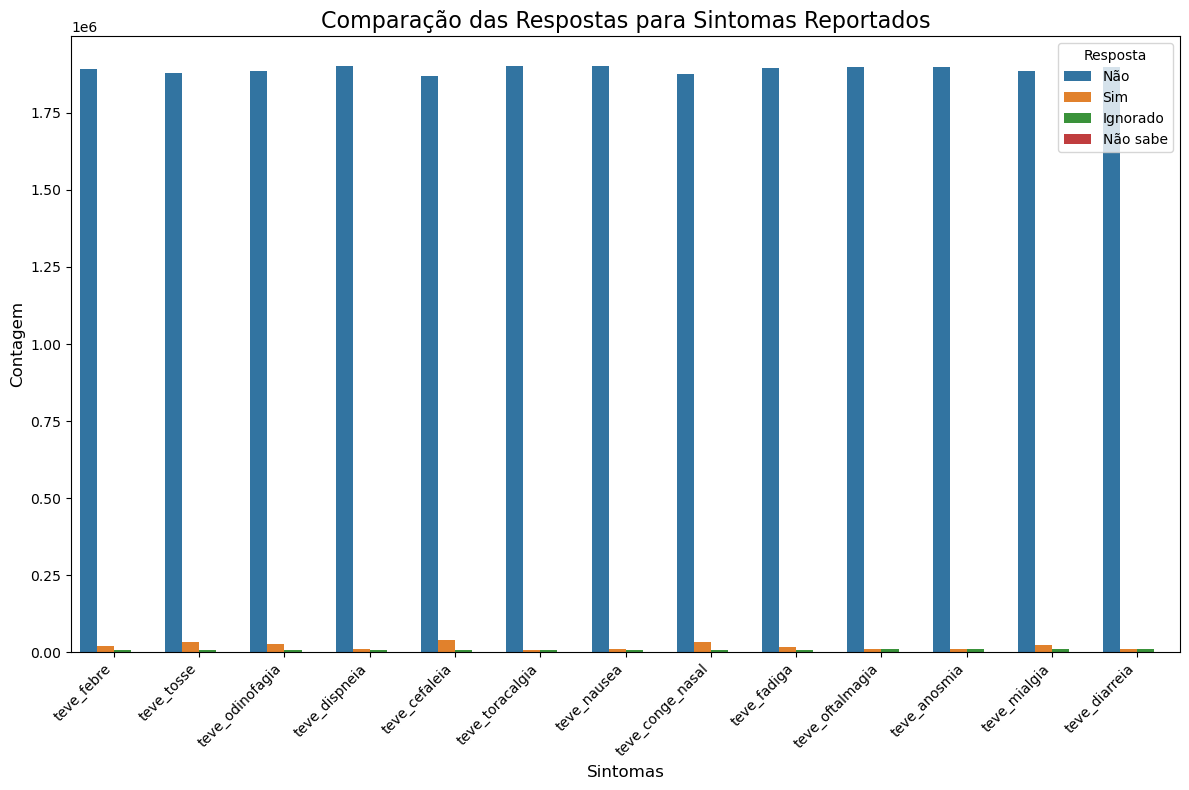

In [36]:

# selecionar apenas as colunas com os sintomas de sindrome gripal
colunas = [
    'teve_febre', 'teve_tosse', 'teve_odinofagia', 'teve_dispneia', 
    'teve_cefaleia', 'teve_toracalgia', 'teve_nausea', 'teve_conge_nasal', 
    'teve_fadiga', 'teve_oftalmagia', 'teve_anosmia', 'teve_mialgia', 'teve_diarreia'
]

# realiza o melt do df para empilhar as colunas
df_melt = pnad_covid3[colunas].melt(var_name='Sintoma', value_name='Resposta')

plt.figure(figsize=(12, 8))
sns.countplot(data=df_melt, x='Sintoma', hue='Resposta')
plt.title('Comparação das Respostas para Sintomas Reportados', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sintomas', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Resposta')
plt.tight_layout()

plt.show()

In [37]:

# verificar as correlações entre os diagnosticos de doença cronica com variaveis demograficas usando os valores de correção amostral
# selecionar as colunas de doença cronica
doencas = ['diag_diabetes', 'diag_has', 'diag_broncopatia', 
           'diag_cardiopatia', 'diag_depressao', 'diag_cancer']

# aqui precisa criar um df com variaveis independentes e pesos
X = pnad_covid[['uf', 'idade', 'sexo', 'cor', 'escolaridade']]
X = sm.add_constant(X)
# resultado da prevalencia das doencas por variaveis
resultados = {}
for doenca in doencas:
    model = sm.WLS(pnad_covid[doenca], X, weights=pnad_covid['peso'])
    resultados[doenca] = model.fit()

for doenca, resultado in resultados.items():
    print(f"Prevalência de {doenca}:")
    print(resultado.summary())

Prevalência de diag_diabetes:
                            WLS Regression Results                            
Dep. Variable:          diag_diabetes   R-squared:                       0.017
Model:                            WLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6637.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:07:24   Log-Likelihood:            -1.7702e+06
No. Observations:             1919883   AIC:                         3.540e+06
Df Residuals:                 1919877   BIC:                         3.540e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2

# Quesitos da diretora clínica

In [47]:
# rever os tipos de reposta que existem nas colunas de doenças crônicas
contagem_cronica = pnad_covid3['diag_has'].value_counts()
print(contagem_cronica)

diag_has
Não         1625471
Sim          285879
Ignorado       8533
Name: count, dtype: int64


In [65]:
# aqui vamos começar selecionando a coluna dos estados
uf_col = 'uf'

# filtro para as respostas de "Sim" e "Não"
pnad_covid3_filtrado = pnad_covid3[pnad_covid3[doencas].isin(['Sim', 'Não']).all(axis=1)]

# "Sim" e "Não" para cada doença por estado
contagem_doencas_estado = pnad_covid3_filtrado.groupby(uf_col)[doencas].apply(lambda x: x.apply(pd.Series.value_counts))


# separar apenas valores de "sim" para calcular a prevalência
contagem_sim_estado = contagem_doencas_estado.xs('Sim', level=1)

#  número total de registros por estado para calcular a porcentagem
total_por_estado = pnad_covid3_filtrado.groupby(uf_col).size()

# claculo da prevalência em percentual (número de sim dividido pelo total de registros por estado)
prevalencia_por_estado = (contagem_sim_estado[doencas].T / total_por_estado).T * 100

# somar a prevalencia total de todas as doenças cronicas por estado 
prevalencia_total_por_estado = prevalencia_por_estado.sum(axis=1).sort_values(ascending=False)

# ver quais os 5 estados com maior prevalência de doenças crônicas
top_5_estados = prevalencia_total_por_estado.head(5)
print("Os 5 estados com maior prevalência de doenças crônicas em %:")
print(top_5_estados)


Os 5 estados com maior prevalência de doenças crônicas em %:
uf
Rio Grande do Sul    46.062474
Minas Gerais         40.732060
São Paulo            38.413243
Paraná               38.193102
Distrito Federal     36.587089
dtype: float64


C:\Users\johnn\AppData\Local\Temp\ipykernel_19192\3100244332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prevalencia_total_por_estado.index, y=prevalencia_total_por_estado.values, palette="magma")


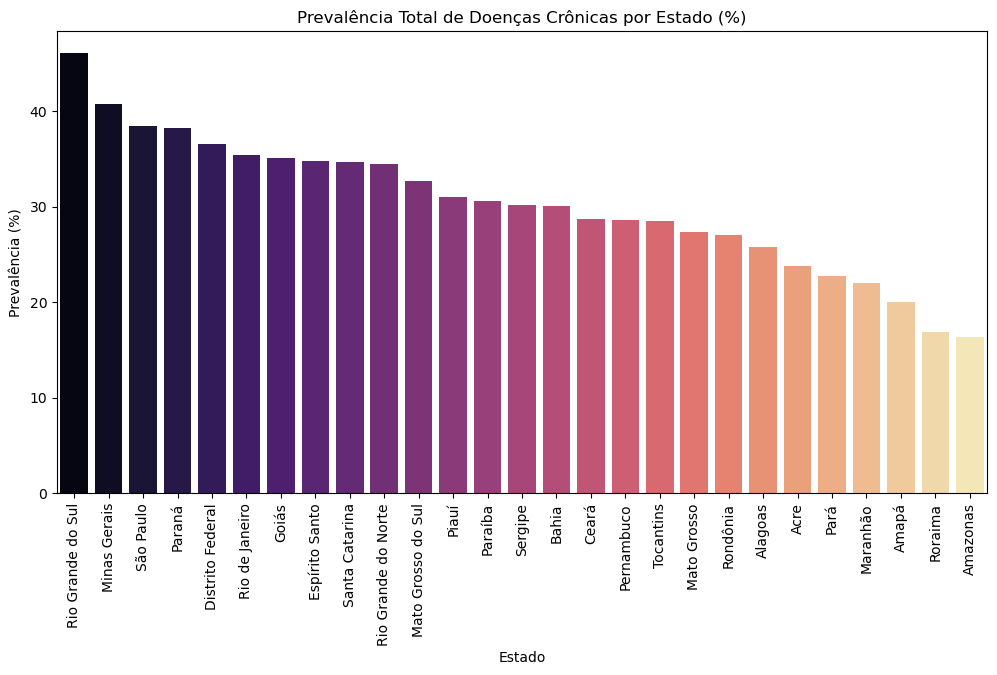

In [50]:
# Gráfico de barras para prevalência total de doenças crônicas por estado
plt.figure(figsize=(12, 6))
sns.barplot(x=prevalencia_total_por_estado.index, y=prevalencia_total_por_estado.values, palette="magma")
plt.title('Prevalência Total de Doenças Crônicas por Estado (%)')
plt.xlabel('Estado')
plt.ylabel('Prevalência (%)')
plt.xticks(rotation=90)
plt.show()



<Figure size 1200x600 with 0 Axes>

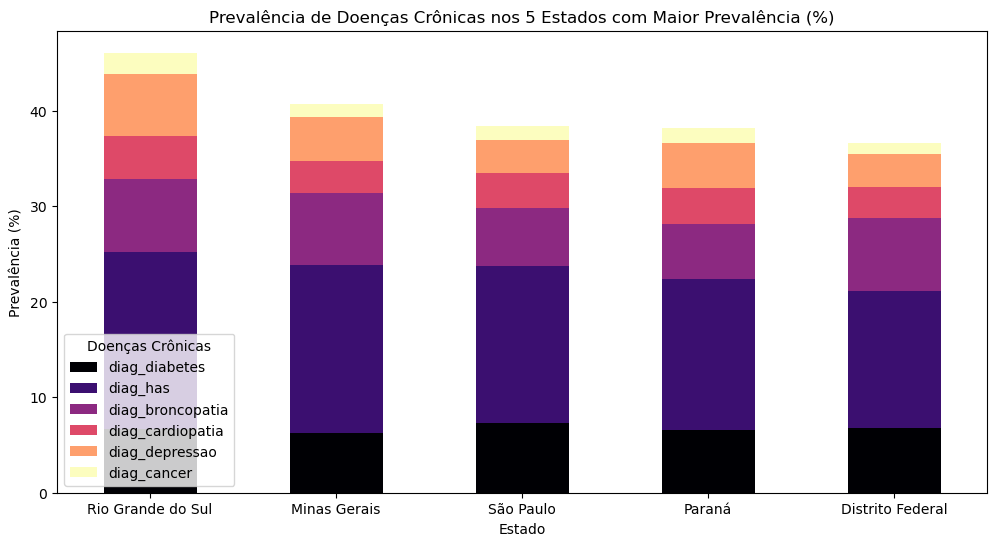

In [51]:
# Gráfico de barras empilhadas para os 5 estados com maior prevalência
plt.figure(figsize=(12, 6))
prevalencia_top_5 = prevalencia_por_estado.loc[top_5_estados.index]
prevalencia_top_5.plot(kind='bar', stacked=True, colormap='magma', figsize=(12, 6))
plt.title('Prevalência de Doenças Crônicas nos 5 Estados com Maior Prevalência (%)')
plt.xlabel('Estado')
plt.ylabel('Prevalência (%)')
plt.legend(title='Doenças Crônicas')
plt.xticks(rotation=0)
plt.show()

C:\Users\johnn\AppData\Local\Temp\ipykernel_19192\3538754595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_teste_percentual.index, y=contagem_teste_percentual.values, palette='inferno')


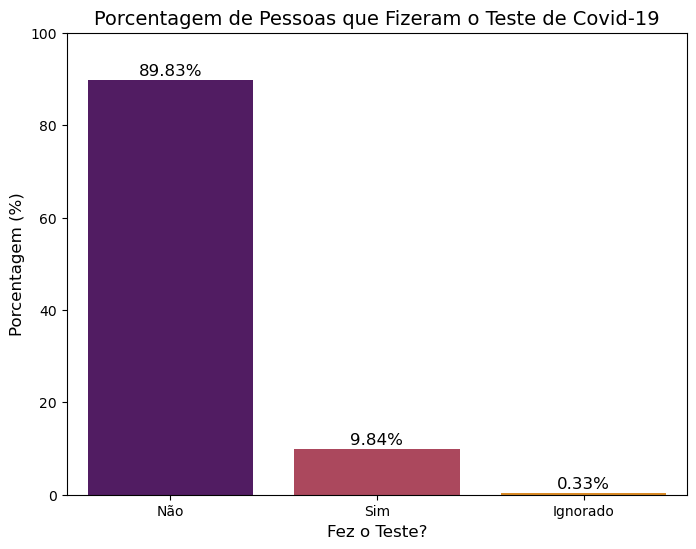

In [53]:
# Contagem em porcentagem
contagem_teste_percentual = pnad_covid3['fez_teste'].value_counts(normalize=True) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_teste_percentual.index, y=contagem_teste_percentual.values, palette='inferno')
plt.title('Porcentagem de Pessoas que Fizeram o Teste de Covid-19', fontsize=14)
plt.xlabel('Fez o Teste?', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.ylim(0, 100)

for i, valor in enumerate(contagem_teste_percentual.values):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', fontsize=12)

plt.show()

In [54]:
# Criar uma nova coluna para indicar se houve solicitação de empréstimo ou não
pnad_covid3['solicitou'] = pnad_covid3['solicitou_emprestimo'].apply(
    lambda x: 'Pediu' if 'Sim' in x else 'Não pediu'
)

# Contagem percentual de quem solicitou ou não empréstimo
contagem_emprestimo_percentual = pnad_covid3['solicitou'].value_counts(normalize=True) * 100

# Exibir a porcentagem
print(contagem_emprestimo_percentual)

solicitou
Não pediu    92.277602
Pediu         7.722398
Name: proportion, dtype: float64


C:\Users\johnn\AppData\Local\Temp\ipykernel_19192\3967592445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_emprestimo_percentual.index, y=contagem_emprestimo_percentual.values, palette='Greens_d')


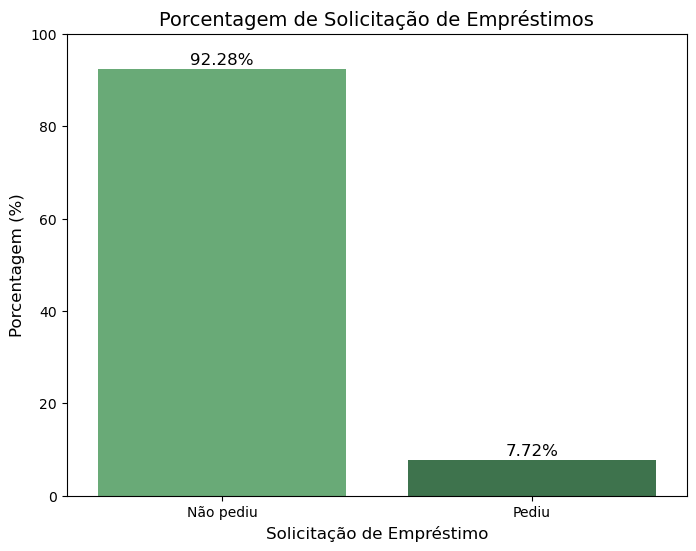

In [55]:
# Gráfico de barras para a porcentagem de solicitação de empréstimo
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_emprestimo_percentual.index, y=contagem_emprestimo_percentual.values, palette='Greens_d')

# Personalizar o gráfico
plt.title('Porcentagem de Solicitação de Empréstimos', fontsize=14)
plt.xlabel('Solicitação de Empréstimo', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.ylim(0, 100)

# Adicionar os valores no topo das barras
for i, valor in enumerate(contagem_emprestimo_percentual.values):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', fontsize=12)

plt.show()

In [64]:

# precisamos criar uma nova coluna para extrair o mês e o ano
pnad_covid3['mes_ano'] = pnad_covid3['data'].dt.to_period('M')

# vamos precisar contar quantas pessoas solicitaram empréstimo por mês
emprestimos_por_mes = pnad_covid3[pnad_covid3['solicitou'] == 'Pediu'].groupby('mes_ano').size()

# Contar o total de registros por mês para calcular a porcentagem
total_por_mes = pnad_covid3.groupby('mes_ano').size()

# Calcular a porcentagem de pessoas que solicitaram empréstimo por mês
percentual_emprestimos_por_mes = (emprestimos_por_mes / total_por_mes) * 100

print(percentual_emprestimos_por_mes)

mes_ano
2020-07    5.851116
2020-08    7.093553
2020-09    7.876622
2020-10    8.564084
2020-11    9.248161
Freq: M, dtype: float64


# Quesitos da diretora financeira


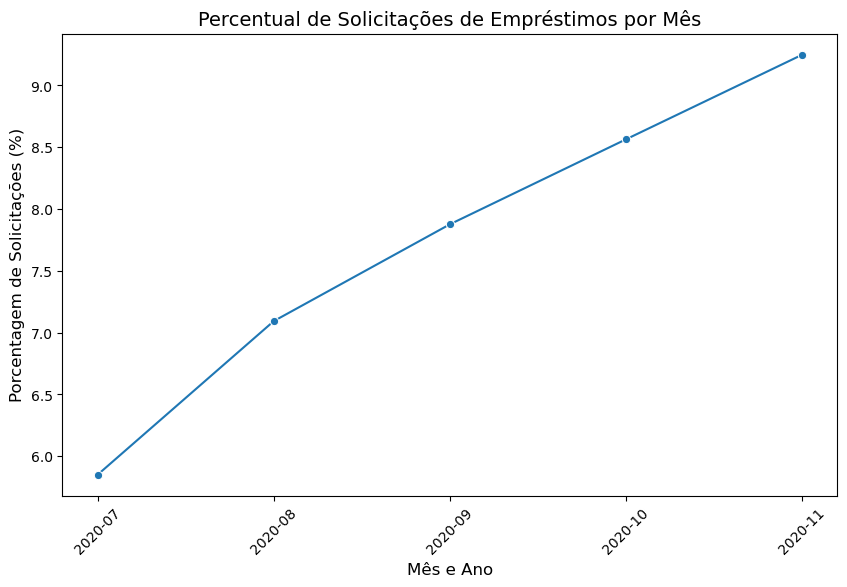

In [57]:
# grafico de linha para ver a tendência dos pedidos de empréstimo ao longo dos meses
plt.figure(figsize=(10, 6))
sns.lineplot(x=percentual_emprestimos_por_mes.index.astype(str), y=percentual_emprestimos_por_mes.values, marker='o')
plt.title('Percentual de Solicitações de Empréstimos por Mês', fontsize=14)
plt.xlabel('Mês e Ano', fontsize=12)
plt.ylabel('Porcentagem de Solicitações (%)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [59]:
# Criação de uma data inicial para referência para ver a progressão com o tempo estudado
data_inicio = pnad_covid3['data'].min()

# Caqui vamos calcular o número de meses desde a data inicial que temos pois excluimos a coluna meses anteriormente
pnad_covid3['mes_ano_numerico'] = ((pnad_covid3['data'].dt.year - data_inicio.year) * 12 +
                                    (pnad_covid3['data'].dt.month - data_inicio.month))

# como mudamos o dataframe para usar dados categóricos, precisamos transformar novamente as infos em variáveis binárias
pnad_covid3['solicitou_bin'] = np.where(pnad_covid3['solicitou'] == 'Pediu', 1, 0)

In [60]:
# definição das variáveis X (independente) e Y (dependente) para cálculo estatístico
X = sm.add_constant(pnad_covid3['mes_ano_numerico'])  
y = pnad_covid3['solicitou_bin']

# usar regressão logística
modelo_logit = sm.Logit(y, X).fit()

print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.270978
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          solicitou_bin   No. Observations:              1919883
Model:                          Logit   Df Residuals:                  1919881
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                0.003524
Time:                        23:21:14   Log-Likelihood:            -5.2025e+05
converged:                       True   LL-Null:                   -5.2209e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.7245      0.005   -543.213      0.000      -2.734      -2.715
mes_ano_num

In [62]:
# usando os coeficientes do modelo para calculo da probabilidade de solicitacao de empréstimo
coef_const = -2.7245
coef_tempo = 0.1165

# função logística para calcular a probabilidade
def probabilidade_emprestimo(t):
    logit = coef_const + coef_tempo * t
    prob = 1 / (1 + np.exp(-logit))
    return prob

# Calculando a probabilidade para 6 meses
probabilidade_6_meses = probabilidade_emprestimo(6)
print(f'Probabilidade de solicitar empréstimo após 6 meses: {probabilidade_6_meses:.4f}')

Probabilidade de solicitar empréstimo após 6 meses: 0.1166


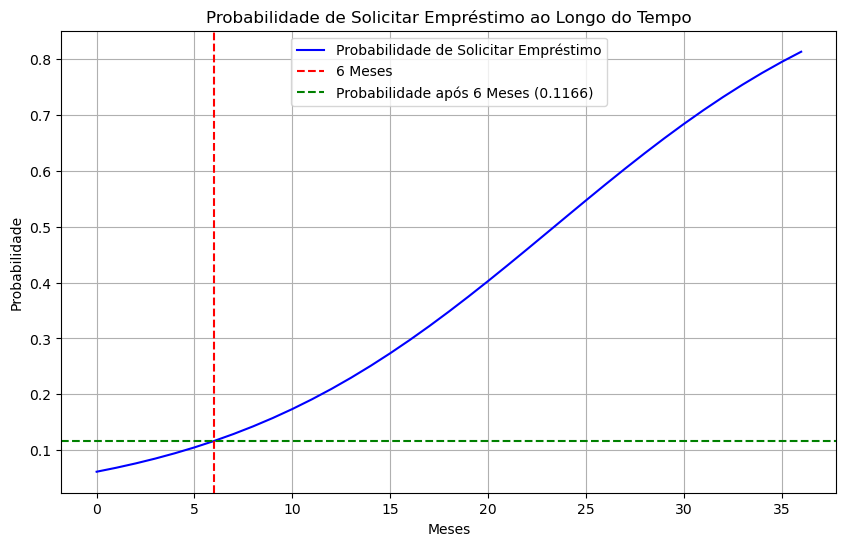

In [63]:
# mostrar a probabilidade de forma gráfica
# Gerar valores de tempo (meses) e calcular a probabilidade para 6 meses
valores_tempo = np.arange(0, 37)  # De 0 a 36 meses
probabilidades = [probabilidade_emprestimo(t) for t in valores_tempo]
probabilidade_6_meses = probabilidade_emprestimo(6)

plt.figure(figsize=(10, 6))
plt.plot(valores_tempo, probabilidades, label='Probabilidade de Solicitar Empréstimo', color='blue')
plt.axvline(x=6, color='red', linestyle='--', label='6 Meses')
plt.axhline(y=probabilidade_6_meses, color='green', linestyle='--', label=f'Probabilidade após 6 Meses ({probabilidade_6_meses:.4f})')
plt.title('Probabilidade de Solicitar Empréstimo ao Longo do Tempo')
plt.xlabel('Meses')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

# Interpretação dos Resultados
## Coeficiente (coef):

Constante: -2.7245
Coeficiente do mes_ano_numerico: 0.1165
O coeficiente positivo para mes_ano_numerico sugere que, conforme o tempo avança, a probabilidade de solicitar um empréstimo aumenta. A cada mês adicional, a probabilidade de fazer uma solicitação de empréstimo aumenta, conforme indicado pelo coeficiente de 0.1165.

## Erro padrão (std err):

Constante: 0.005
Coeficiente do mes_ano_numerico: 0.002
Os erros padrão observados são relativamente pequenos, o que sugere que as estimativas dos coeficientes são precisas.

## Estatística z (z) e p-valor (P>|z|):

Coeficiente do mes_ano_numerico: z = 60.429, p-valor < 0.0001
A alta estatística z e o p-valor muito baixo indicam que o coeficiente do mes_ano_numerico é altamente significativo. Em outras palavras, há evidências fortes de que o tempo tem um impacto significativo na probabilidade de solicitar um empréstimo.

## Pseudo R-squared:

Pseudo R²: 0.003524
O Pseudo R² é muito baixo, indicando que o modelo explica apenas uma pequena fração da variabilidade dos dados.

## Log-Likelihood e p-valor do teste de razão de verossimilhança (LLR):

Log-Likelihood: -5.2025e+05
LLR p-value: < 0.0001
O p-valor do teste de razão de verossimilhança sugere que o modelo é significativo, e o coeficiente do tempo é relevante para explicar a variabilidade na probabilidade de solicitação de empréstimos.

## Escolha da análise estatística
A função logística é utilizada para modelar a probabilidade de um evento binário (ou seja, um evento com duas possíveis respostas, como "Sim" ou "Não") com base em uma variável contínua (como o tempo). No nosso caso, a função logística é apropriada porque estamos lidando com a probabilidade de um evento (solicitação de empréstimo) que pode ser modelada como uma função do tempo.

## Conclusão
O aumento na variável mes_ano_numerico (que representa o tempo) tem um efeito positivo e significativo na probabilidade de solicitação de empréstimos. O coeficiente positivo e o p-valor muito baixo indicam que o aumento é estatisticamente significativo.
Embora o Pseudo R² seja baixo, o modelo ainda fornece uma indicação clara de que há uma tendência crescente significativa ao longo do tempo.

Com o uso de função logística, foi possível observar que há uma probabilidade de 11% de ser solicitado empréstimo entre a população.

In [38]:
#salvar o dataset atualizado para ser importado no powerbi
pnad_covid3.to_csv('pnad_covid3.csv', index=False)